In [ ]:
print("Hello World")

Hello World


## Exploring Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

### Customer Address Dataset

In [ ]:
df = pd.read_excel('CustomerAddress.xlsx')
df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
df.shape

(3999, 6)

In [ ]:
def check(df): #to check on the data
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check

check(df)

,column,dtypes,nunique,sum_null
0,customer_id,int64,3999,0
1,address,object,3996,0
2,postcode,int64,873,0
3,state,object,5,0
4,country,object,1,0
5,property_valuation,int64,12,0


In [ ]:
print(df.isnull().values.any())   #Check if there are null values
df.isnull().sum()

False


customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [ ]:
df.shape

(3999, 6)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.skew(axis = 0, skipna = True) #to test for skewness

<ipython-input-9-c789b15bf834>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(axis = 0, skipna = True)


customer_id          -0.000062
postcode              0.625983
property_valuation   -0.631451
dtype: float64

<ipython-input-10-80d6416828e8>:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('This distribution has skew', df.skew())


This distribution has skew customer_id          -0.000062
postcode              0.625983
property_valuation   -0.631451
dtype: float64


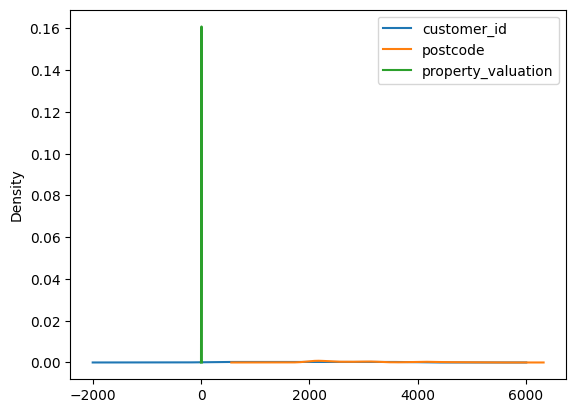

In [ ]:
from scipy.stats import skew
df.plot(kind = 'density')
print('This distribution has skew', df.skew())

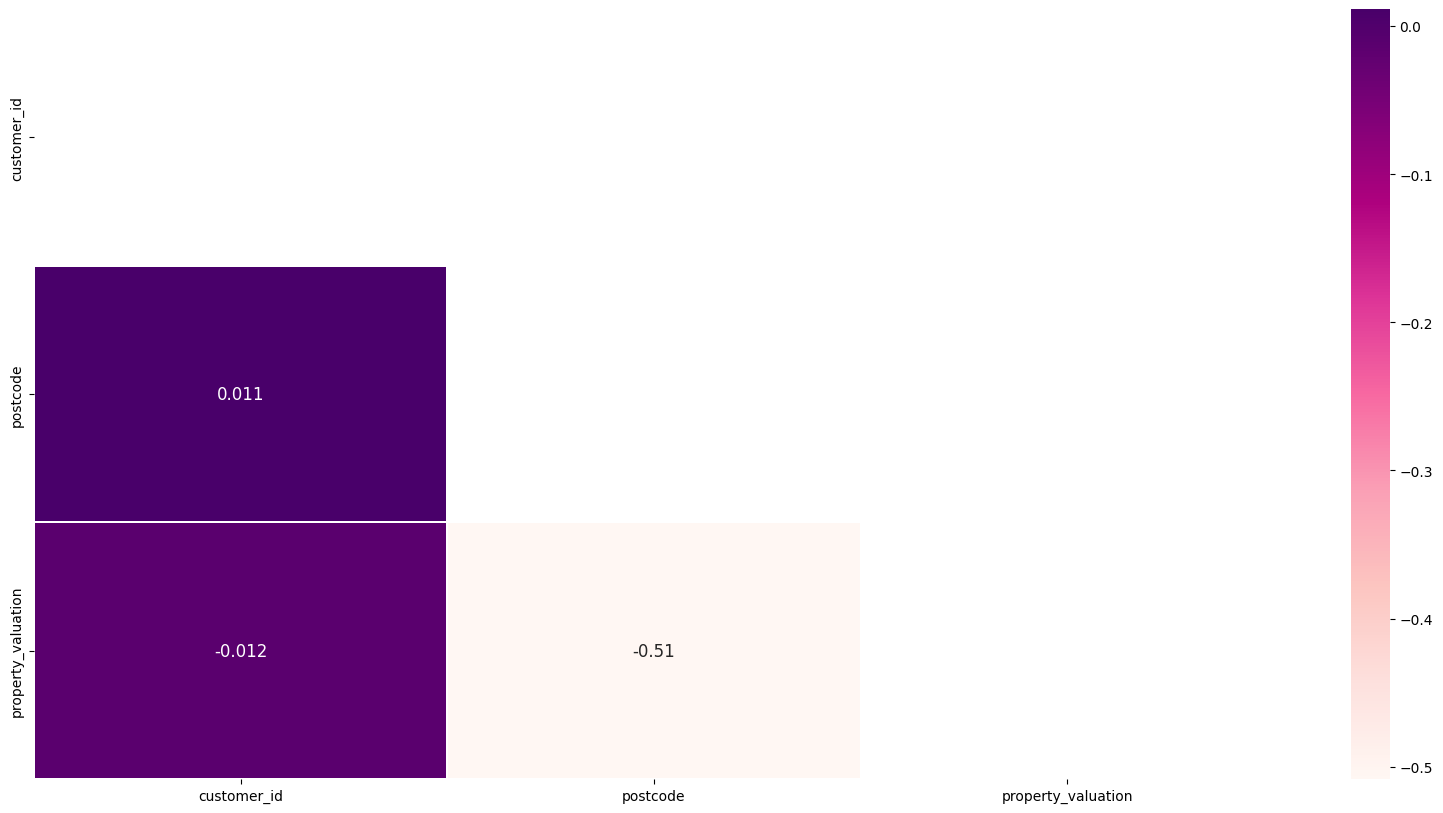

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize =(20, 10))
sns.heatmap(corrmat, ax = ax, mask=np.triu(np.ones_like(corrmat, dtype=np.bool)), annot=True, annot_kws={"size": 12}, linewidths = 0.1, cmap='RdPu', fmt = '0.2' );

### Customer Demographics Dataset

In [ ]:
df1 = pd.read_excel('CustomerDempgraphics.xlsx')
df1.head()

<ipython-input-11-9ad675333c23>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df1 = pd.read_excel('CustomerDempgraphics.xlsx')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
2,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0
3,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0
4,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8.0


In [ ]:
df1.shape

(4000, 13)

In [ ]:
def check(df1): #to check on the data
    l=[]
    columns=df1.columns
    for col in columns:
        dtypes=df1[col].dtypes
        nunique=df1[col].nunique()
        sum_null=df1[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df1_check=pd.DataFrame(l)
    df1_check.columns=['column','dtypes','nunique','sum_null']
    return df1_check

check(df1)

,column,dtypes,nunique,sum_null
0,customer_id,int64,4000,0
1,first_name,object,3139,0
2,last_name,object,3725,125
3,gender,object,6,0
4,past_3_years_bike_related_purchases,int64,100,0
5,DOB,datetime64[ns],3448,87
6,job_title,object,195,506
7,job_industry_category,object,9,656
8,wealth_segment,object,3,0
9,deceased_indicator,object,2,0


In [ ]:
print(df1.isnull().values.any())   #Check if there are null values
df1.isnull().sum()

True


customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [ ]:
df1.duplicated().sum()

0

UFuncTypeError: ignored

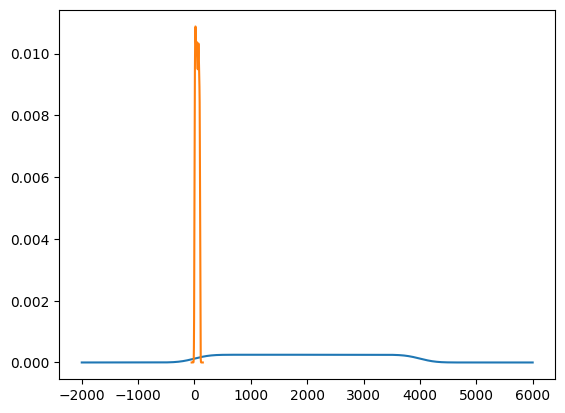

In [ ]:
#df1 = df1.drop("default", axis='columns')
#df1.shape
df1.plot(kind = 'density')
print('This distribution has skew', df1.skew())

In [ ]:
df1.skew(axis = 0, skipna = True)

customer_id                            0.000000
past_3_years_bike_related_purchases    0.045286
tenure                                 0.063799
dtype: float64

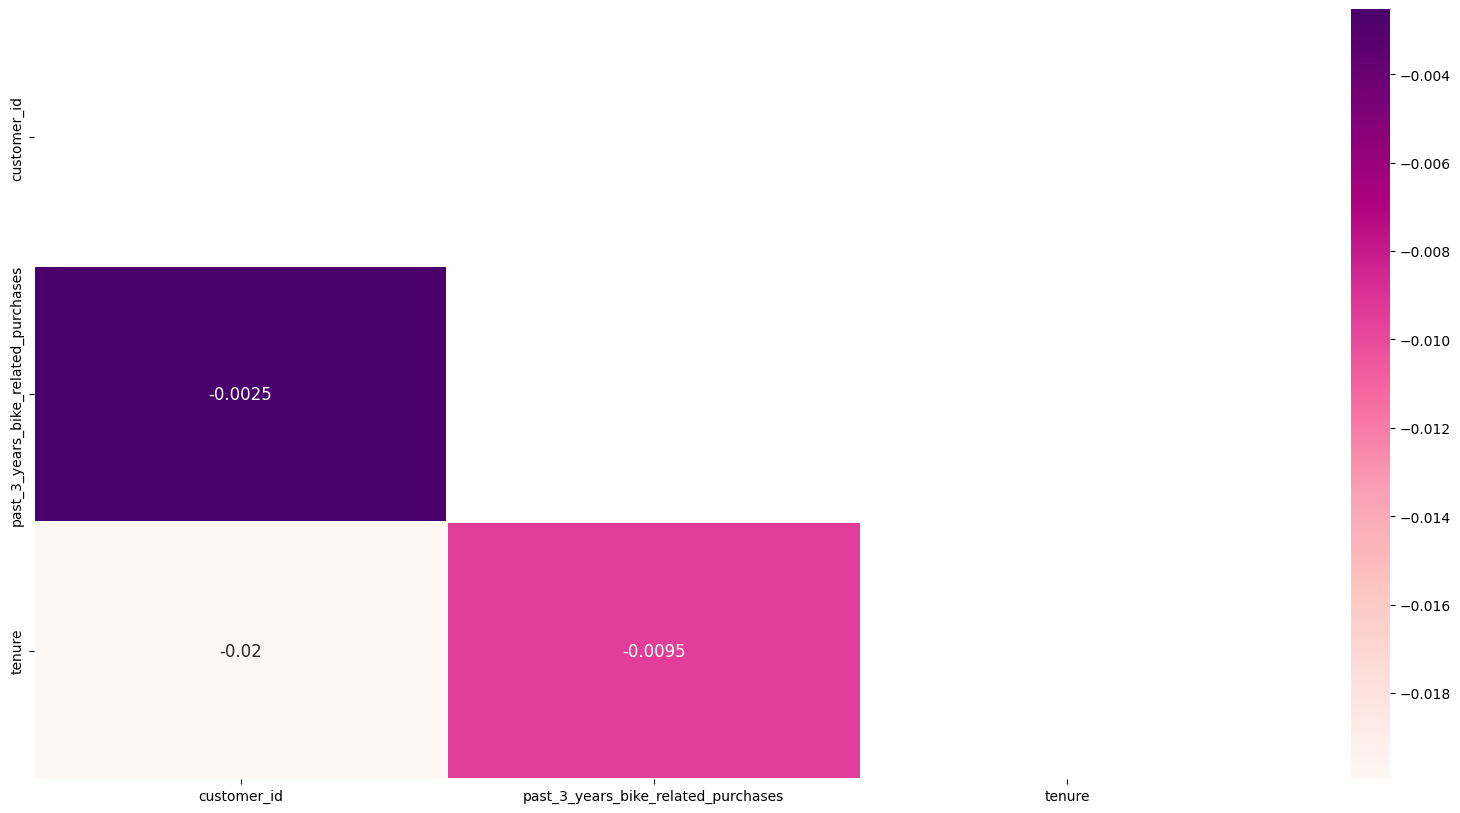

In [ ]:
corrmat = df1.corr()
f, ax = plt.subplots(figsize =(20, 10))
sns.heatmap(corrmat, ax = ax, mask=np.triu(np.ones_like(corrmat, dtype=np.bool)), annot=True, annot_kws={"size": 12}, linewidths = 0.1, cmap='RdPu', fmt = '0.2' );

### Transaction Dataset

In [ ]:
df3 = pd.read_excel('Transaction.xlsx')
df3.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,253,2,3123,2017-12-30,0.0,Approved,Giant Bicycles,Road,low,small,590.26,525.33,40487.0
1,411,62,3355,2017-12-30,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,34143.0
2,497,62,1854,2017-12-30,1.0,Approved,Solex,Standard,high,medium,1024.66,614.80,34244.0
3,606,70,2878,2017-12-30,0.0,Approved,Trek Bicycles,Standard,high,medium,495.72,297.43,36367.0
4,748,80,2865,2017-12-30,1.0,Approved,Trek Bicycles,Standard,medium,large,1469.44,596.55,41047.0


In [ ]:
df3.shape

(20000, 13)

In [ ]:
df3.duplicated().sum()

0

In [ ]:
print(df3.isnull().values.any())   #Check if there are null values
df3.isnull().sum()

True


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

UFuncTypeError: ignored

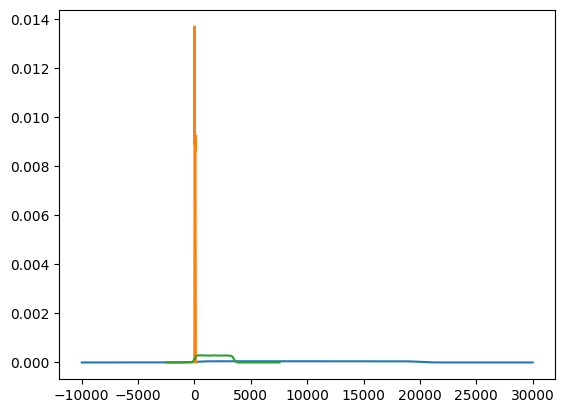

In [ ]:
from scipy.stats import skew
df3.plot(kind = 'density')
print('This distribution has skew', df3.skew())

In [ ]:
df3.skew(axis = 0, skipna = True)

<ipython-input-21-a8007d25f2a2>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.skew(axis = 0, skipna = True)


transaction_id             0.000000
product_id                 0.081821
customer_id                0.012440
online_order              -0.001833
list_price                -0.125804
standard_cost              0.864142
product_first_sold_date   -0.113909
dtype: float64

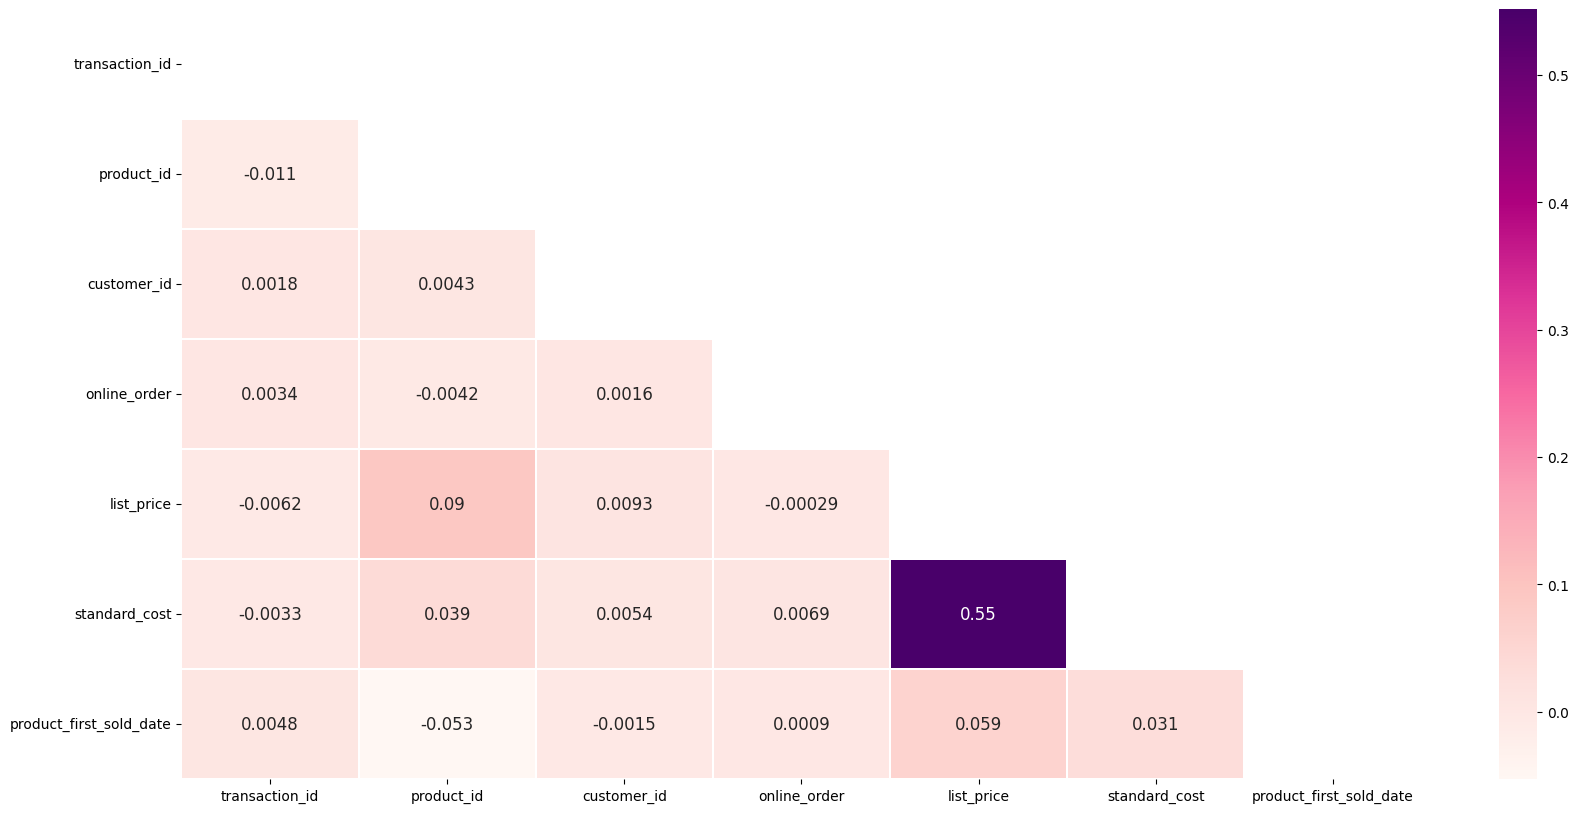

In [ ]:
corrmat = df3.corr()
f, ax = plt.subplots(figsize =(20, 10))
sns.heatmap(corrmat, ax = ax, mask=np.triu(np.ones_like(corrmat, dtype=np.bool)), annot=True, annot_kws={"size": 12}, linewidths = 0.1, cmap='RdPu', fmt = '0.2' );

### New Customer List Dataset

In [ ]:
df2 = pd.read_excel('NewCustomerList.xlsx')
df2.head()

<ipython-input-47-72a33cc9c6a9>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df2 = pd.read_excel('NewCustomerList.xlsx')


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.76,0.9500,1.1875,1.009375,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.99,0.9900,1.2375,1.051875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.51,0.5100,0.5100,0.510000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.61,0.7625,0.7625,0.762500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.41,0.4100,0.5125,0.512500,4,4,1.703125


In [ ]:
df2.duplicated().sum()

0

In [ ]:
print(df2.isnull().values.any())   #Check if there are null values
df2.isnull().sum()

True


first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6